*Extra analysis of the subway service ridership scripts*. In particular, applying different factors to get a better estimate of 2025 ridership. 

# Imports/Installation

In [17]:
import gtfs_kit as gk
import pandas as pd 
import folium
from geodatasets import get_path
import shapely
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import tab20
import matplotlib.cm as cm
import matplotlib.colors as mcolors
mpl.rcParams['figure.dpi'] = 150

In [4]:
orig_stations_df = pd.read_csv("../data/MTA_Subway_Stations_20240325.csv")
orig_stations_df = orig_stations_df[orig_stations_df['Borough']!='SI'] 
orig_stations_df = orig_stations_df.drop(columns=['Division', 'ADA', 'ADA Northbound', 'ADA Southbound', 'ADA Notes'
                                                , 'North Direction Label', 'South Direction Label'])

In [7]:
yearly_ridership = pd.read_csv("../saved_data/routes_yearly_ridership.csv", index_col=0)

# Adjusting Yearly Ridership DataFrame

In [ ]:
# 2024 ridership (Q1 and Q2)
# https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-2020-2024/wujg-7c2s/explore/query/SELECT%20%60transit_mode%60%2C%20sum%28%60ridership%60%29%20AS%20%60sum_ridership%60%0AWHERE%0A%20%20%60transit_timestamp%60%0A%20%20%20%20BETWEEN%20%222024-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222024-07-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0AGROUP%20BY%20%60transit_mode%60/page/aggregate
total_ridership_24 = 589117753
# 2025 ridership (Q1 and Q2)
# https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-Beginning-2025/5wq4-mkjj/explore/query/SELECT%20%60transit_mode%60%2C%20sum%28%60ridership%60%29%20AS%20%60sum_ridership%60%0AWHERE%0A%20%20%60transit_timestamp%60%0A%20%20%20%20BETWEEN%20%222025-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222025-07-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0AGROUP%20BY%20%60transit_mode%60/page/aggregate
total_ridership_25 = 638233041
# 8% increase
yearly_change_ratio = total_ridership_25 / total_ridership_24
yearly_ridership['Adjusted_unlinked_2025'] = yearly_ridership['yearly_ridership_including_transfers_MM'] * yearly_change_ratio

In [14]:
yearly_ridership

,route_id,yearly_ridership_MM,yearly_ridership_including_transfers_MM,Adjusted_unlinked_2025
0,1,102.22,172.92,187.336499
1,7,98.34,166.36,180.229586
2,6,98.32,166.33,180.197085
3,F,89.26,150.99,163.578175
4,R,77.10,130.44,141.314903
5,N,71.87,121.58,131.716236
6,A,70.09,118.57,128.455290
7,E,67.40,114.03,123.536786
8,Q,61.60,104.21,112.898083
9,2,58.00,98.11,106.289521


## Plots of Service Ridership

<Axes: >

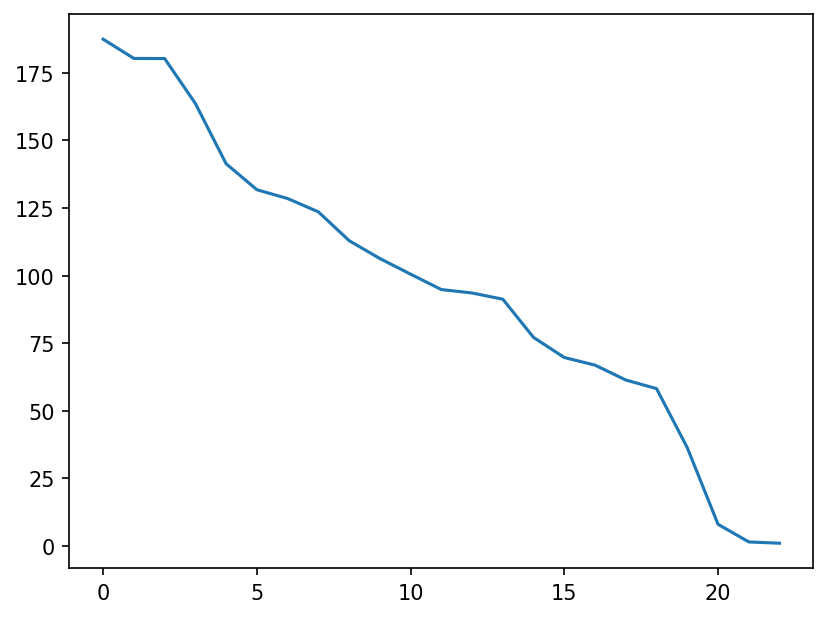

In [ ]:
# speed, especially at late nights, depends on how "local" the services are
yearly_ridership['Adjusted_unlinked_2025'].plot()

<Axes: xlabel='route_id', ylabel='Adjusted_unlinked_2025'>

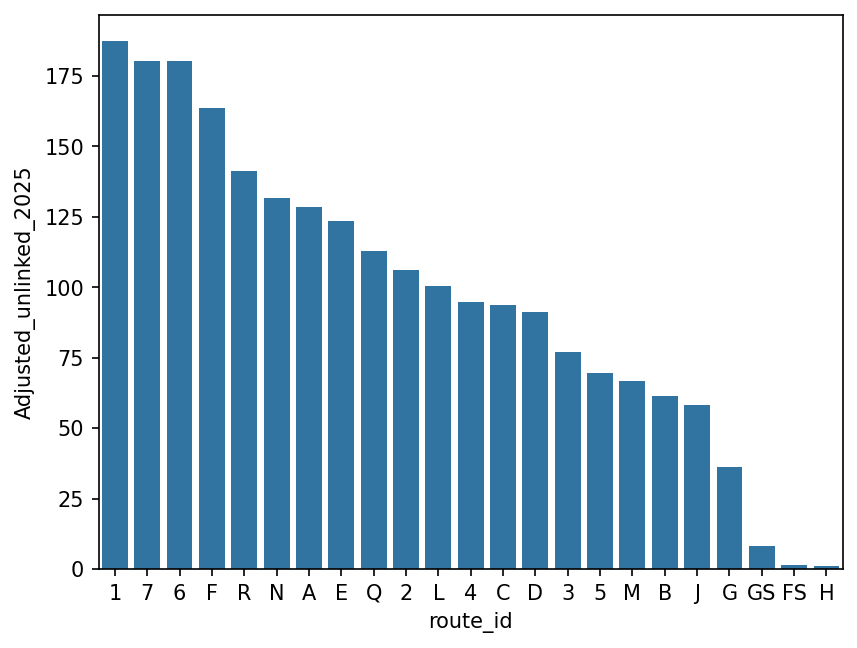

In [18]:
sns.barplot(yearly_ridership, x='route_id', y='Adjusted_unlinked_2025')